# Stylometry - model training

### Used classifiers
 - Decision Tree
 - kNN (NYI)
 - SVM (NYI)
 
 
 - ? Logistic Regression (NYI)

## Imports

In [1]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import preprocessing
from dateutil import parser
import statistics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.impute import KNNImputer
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from skmultilearn.model_selection import IterativeStratification
from sklearn.linear_model import LogisticRegression
import gc
import warnings
warnings.filterwarnings('ignore')

## Helper functions

In [2]:
def scale(df_to_scale, ignored_cols):
    cols_to_scale = df_to_scale.drop(ignored_cols , axis=1).columns
    min_max_scaler = MinMaxScaler()
    df_to_scale[cols_to_scale] = min_max_scaler.fit_transform(df_to_scale[cols_to_scale])
    df.info()
    return df_to_scale

In [3]:
def evaluate(real, predicted):
    print("Evaluation: ")
    countGood = 0
    total = len(real)
    falsePos = 0
    falseNeg = 0
    truePos = 0
    trueNeg = 0
    if total != len(predicted):
        print("Non-matching sample lengths")
        return None
    for i in range(0, total):
        countGood += 1 if real[i] == predicted[i] else 0

    # accuracy = str(countGood / total)
    # precision = str(truePos / (truePos + falsePos))
    # recall = str(truePos / (truePos + falseNeg))
    
    print("accuracy " + str(countGood / total))
    return countGood / total

## Data import
\+calculate positional error occurence per token

In [35]:

df = pd.read_csv('19authors_3grams_swaps_blogsfirstfew_50articles.csv', sep=',')
df['Toperror_pertokens'] = df['Toperror'] / df['Tokens']
df['Lefterror_pertokens'] = df['Lefterror'] / df['Tokens']
df['Righterror_pertokens'] = df['Righterror'] / df['Tokens']
df['Downerror_pertokens'] = df['Downerror'] / df['Tokens']
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Columns: 2304 entries, Author to Downerror_pertokens
dtypes: float64(918), int64(1386)
memory usage: 16.7 MB


,Author,UppercaseLetter,UppercaseLetter_pertokens,LowercaseLetter,LowercaseLetter_pertokens,TitlecaseLetter,TitlecaseLetter_pertokens,ModifierLetter,ModifierLetter_pertokens,OtherLetter,OtherLetter_pertokens,NonSpacingMark,NonSpacingMark_pertokens,SpacingCombiningMark,SpacingCombiningMark_pertokens,EnclosingMark,EnclosingMark_pertokens,DecimalDigitNumber,DecimalDigitNumber_pertokens,LetterNumber,LetterNumber_pertokens,OtherNumber,OtherNumber_pertokens,SpaceSeparator,SpaceSeparator_pertokens,LineSeparator,LineSeparator_pertokens,ParagraphSeparator,ParagraphSeparator_pertokens,Control,Control_pertokens,Format,Format_pertokens,Surrogate,Surrogate_pertokens,PrivateUse,PrivateUse_pertokens,ConnectorPunctuation,ConnectorPunctuation_pertokens,DashPunctuation,DashPunctuation_pertokens,OpenPunctuation,OpenPunctuation_pertokens,ClosePunctuation,ClosePunctuation_pertokens,InitialQuotePunctuation,InitialQuotePunctuation_pertokens,FinalQuotePunctuation,FinalQuotePunctuation_pertokens,OtherPunctuation,OtherPunctuation_pertokens,MathSymbol,MathSymbol_pertokens,CurrencySymbol,CurrencySymbol_pertokens,ModifierSymbol,ModifierSymbol_pertokens,OtherSymbol,OtherSymbol_pertokens,OtherNotAssigned,OtherNotAssigned_pertokens,Toperror,Righterror,Downerror,Lefterror,Misspellratio,pos_0_NN_NN_NN,pos_1_IN_DT_NN,pos_2_NN_IN_NN,pos_3_VB_DT_NN,pos_4_DT_JJ_NN,pos_5_NN_IN_DT,pos_6_JJ_NN_IN,pos_7_DT_NN_IN,pos_8_IN_NN_NN,pos_9_DT_NN_NN,pos_10_NN_NN_VB,pos_11_NN_NN_IN,pos_12_IN_PR_VB,pos_13_NN_IN_PR,pos_14_NN_PR_VB,pos_15_JJ_NN_NN,pos_16_VB_TO_VB,pos_17_VB_IN_DT,pos_18_VB_DT_JJ,pos_19_IN_DT_JJ,pos_20_VB_RB_JJ,pos_21_DT_NN_VB,pos_22_RB_JJ_NN,pos_23_PR_VB_VB,pos_24_VB_IN_NN,pos_25_VB_PR_VB,pos_26_NN_CC_NN,pos_27_IN_PR_NN,pos_28_NN_VB_DT,pos_29_PR_VB_DT,pos_30_JJ_NN_VB,pos_31_VB_IN_PR,pos_32_NN_VB_IN,pos_33_PR_VB_PR,pos_34_NN_VB_VB,pos_35_PR_VB_IN,pos_36_VB_JJ_NN,pos_37_IN_JJ_NN,pos_38_NN_NN_CC,pos_39_PR_VB_RB,pos_40_NN_VB_RB,pos_41_NN_RB_VB,pos_42_VB_VB_IN,pos_43_VB_NN_NN,pos_44_PR_MD_VB,pos_45_NN_VB_NN,pos_46_VB_NN_IN,pos_47_IN_NN_IN,pos_48_VB_PR_NN,pos_49_DT_NN_CC,pos_50_NN_DT_NN,pos_51_PR_RB_VB,pos_52_NN_NN_.,pos_53_NN_TO_VB,pos_54_NN_NN_RB,pos_55_NN_VB_PR,pos_56_NN_IN_JJ,pos_57_LS_._VB,pos_58_._VB_RB,pos_59_IN_NN_VB,pos_60_NN_CC_VB,pos_61_VB_RB_VB,pos_62_CC_PR_VB,pos_63_PR_VB_TO,pos_64_JJ_NN_CC,pos_65_TO_VB_DT,pos_66_JJ_JJ_NN,pos_67_PR_VB_NN,pos_68_IN_NN_CC,pos_69_PR_NN_NN,pos_70_RB_VB_IN,pos_71_NN_CC_PR,pos_72_NN_NN_PR,pos_73_DT_NN_PR,pos_74_RB_VB_DT,pos_75_RB_VB_PR,pos_76_NN_VB_JJ,pos_77_TO_VB_IN,pos_78_PR_JJ_NN,pos_79_DT_NN_RB,pos_80_PR_NN_VB,pos_81_NN_JJ_NN,pos_82_PR_VB_JJ,pos_83_VB_RB_IN,pos_84_PR_NN_IN,pos_85_TO_VB_PR,pos_86_RB_PR_VB,pos_87_NN_VB_TO,pos_88_VB_PR_IN,pos_89_NN_MD_VB,pos_90_VB_RB_RB,pos_91_VB_NN_VB,pos_92_NN_CC_DT,pos_93_RB_IN_DT,pos_94_NN_CC_RB,pos_95_JJ_NN_PR,pos_96_VB_VB_DT,pos_97_TO_VB_NN,pos_98_NN_RB_IN,pos_99_NN_IN_VB,pos_100_NN_NN_DT,pos_101_RB_VB_NN,pos_102_RB_IN_PR,pos_103_WR_PR_VB,pos_104_VB_PR_RB,pos_105_RB_DT_NN,pos_106_JJ_NN_RB,pos_107_TO_DT_NN,pos_108_RB_IN_NN,pos_109_VB_VB_NN,pos_110_CC_NN_NN,pos_111_VB_VB_PR,pos_112_VB_JJ_IN,pos_113_JJ_IN_DT,pos_114_RB_VB_TO,pos_115_VB_VB_TO,pos_116_CC_NN_VB,pos_117_CC_DT_NN,pos_118_VB_IN_JJ,pos_119_VB_RP_IN,pos_120_NN_NN_CO,pos_121_NN_WD_VB,pos_122_DT_NN_TO,pos_123_NN_RB_RB,pos_124_RB_RB_VB,pos_125_VB_NN_CC,pos_126_IN_PR_MD,pos_127_RB_JJ_IN,pos_128_JJ_TO_VB,pos_129_IN_CD_NN,pos_130_IN_NN_PR,pos_131_JJ_IN_NN,pos_132_CD_NN_IN,pos_133_DT_JJ_JJ,pos_134_IN_PR_JJ,pos_135_VB_NN_RB,pos_136_RB_RB_IN,pos_137_VB_PR_JJ,pos_138_PR_NN_CC,pos_139_JJ_IN_PR,pos_140_MD_VB_DT,pos_141_CO_PR_VB,pos_142_MD_RB_VB,pos_143_IN_PR_RB,pos_144_PR_IN_DT,pos_145_IN_NN_RB,pos_146_VB_VB_RB,pos_147_NN_RB_JJ,pos_148_RB_VB_RB,pos_149_RB_VB_VB,pos_150_DT_NN_DT,pos_151_VB_TO_DT,pos_152_CC_JJ_NN,pos_153_NN_DT_JJ,pos_154_CC_RB_VB,pos_155_NN_PR_MD,pos_156_NN_CO_PR,pos_157_NN_PR_RB,pos_158_NN_IN_CD,pos_159_VB_PR_DT,pos_160_NN_NN_JJ,pos_161_CD_NN_NN,pos_162_CC_NN_IN,pos_163_RB_VB_JJ,pos_164_MD_VB_VB,pos_165_VB_VB_VB,pos_166_MD_VB_PR,

In [36]:
df = df.replace("∞", "0")

In [37]:
# cols_to_scale = df.drop(["Author", "Tokens"] , axis=1).columns
# df_all = df
# min_max_scaler = MinMaxScaler()
# df_all[cols_to_scale] = min_max_scaler.fit_transform(df_all[cols_to_scale])
df_all = scale(df, ["Author", "Tokens"])
df_all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Columns: 2304 entries, Author to Downerror_pertokens
dtypes: float64(2302), int64(2)
memory usage: 16.7 MB


Author  UppercaseLetter  UppercaseLetter_pertokens  LowercaseLetter  \
0         1         0.049887                   0.026998         0.094392   
1         1         0.310658                   0.040069         0.416050   
2         1         0.385488                   0.036212         0.570630   
3         1         0.147392                   0.025927         0.285479   
4         1         0.088435                   0.025498         0.172340   
..      ...              ...                        ...              ...   
945     177         0.052154                   0.015856         0.177931   
946     177         0.006803                   0.025712         0.014965   
947     177         0.000000                   0.000000         0.054761   
948     177         0.000000                   0.000000         0.053445   
949     177         0.011338                   0.003857         0.140602   

     LowercaseLetter_pertokens  TitlecaseLetter  TitlecaseLetter_pertokens  \
0                     0.569186              0.0                        0.0   
1                     0.594720              0.0                        0.0   
2                     0.595756              0.0                        0.0   
3                     0.559869              0.0                        0.0   
4                     0.552968              0.0                        0.0   
..                         ...              ...                        ...   
945                   0.602139              0.0                        0.0   
946                   0.628019              0.0                        0.0   
947                   0.604727              0.0                        0.0   
948                   0.616115              0.0                        0.0   
949                   0.528813              0.0                        0.0   

     ModifierLetter  ModifierLetter_pertokens  OtherLetter  \
0               0.0                       0.0     0.000000   
1               0.0                       0.0     0.068966   
2               0.0                       0.0     0.862069   
3               0.0                       0.0     0.000000   
4               0.0                       0.0     0.000000   
..              ...                       ...          ...   
945             0.0                       0.0     0.000000   
946             0.0                       0.0     0.000000   
947             0.0                       0.0     0.000000   
948             0.0                       0.0     0.000000   
949             0.0                       0.0     0.000000   

     OtherLetter_pertokens  NonSpacingMark  NonSpacingMark_pertokens  \
0                 0.000000             0.0                       0.0   
1                 0.057692             0.0                       0.0   
2                 0.480769             0.0                       0.0   
3                 0.000000             0.0                       0.0   
4                 0.000000             0.0                       0.0   
..                     ...             ...                       ...   
945               0.000000             0.0                       0.0   
946               0.000000             0.0                       0.0   
947               0.000000             0.0                       0.0   
948               0.000000             0.0                       0.0   
949               0.000000             0.0                       0.0   

     SpacingCombiningMark  SpacingCombiningMark_pertokens  EnclosingMark  \
0                     0.0                             0.0            0.0   
1                     0.0                             0.0            0.0   
2                     0.0                             0.0            0.0   
3                     0.0                             0.0            0.0   
4                     0.0                             0.0            0.0   
..                    ...                             ...            ...   
945          

In [38]:
len(df_all['Author'].unique())

19

In [41]:
pd.options.display.max_columns = 20

In [42]:
df_all.describe()

,Author,UppercaseLetter,UppercaseLetter_pertokens,LowercaseLetter,LowercaseLetter_pertokens,TitlecaseLetter,TitlecaseLetter_pertokens,ModifierLetter,ModifierLetter_pertokens,OtherLetter,...,swap_ _m,swap_ _CO,swap_ _.,swap_ _/,swap_ _,Tokens,Toperror_pertokens,Lefterror_pertokens,Righterror_pertokens,Downerror_pertokens
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.0,950.0,950.0,950.0,950.000000,...,950.0,950.0,950.0,950.0,950.0,950.000000,950.000000,950.000000,950.000000,950.000000
mean,81.894737,0.087037,0.039967,0.149850,0.582818,0.0,0.0,0.0,0.0,0.004828,...,0.0,0.0,0.0,0.0,0.0,263.695789,0.009457,0.053631,0.067737,0.014350
std,57.310548,0.107870,0.056133,0.153804,0.081932,0.0,0.0,0.0,0.0,0.053966,...,0.0,0.0,0.0,0.0,0.0,263.196640,0.057221,0.108387,0.140211,0.064396
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.018141,0.020838,0.041153,0.550638,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,74.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,0.052154,0.031926,0.095626,0.590062,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,171.500000,0.000000,0.012809,0.019126,0.000000
75%,120.000000,0.115646,0.044354,0.208354,0.622671,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,370.500000,0.000000,0.056713,0.058701,0.000000
max,177.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1708.000000,1.000000,1.000000,1.000000,1.000000


## Dataframes
df_all - contains all feature columns and author id

df_positional - contains positional errors, token count, misspell ratio and author id

non_empty_cols - all columns with non-zero values

In [125]:
all_cols = df_all.columns
to_add_cols = [  'Author',
#                  'CurrencySymbol_pertokens',
#                  'ConnectorPunctuation_pertokens',
                 'Downerror_pertokens',
#                  'DecimalDigitNumber_pertokens',
#                  'FinalQuotePunctuation_pertokens',
#                  'InitialQuotePunctuation_pertokens',
#                  'LowercaseLetter_pertokens',
                 'Lefterror_pertokens',
#                  'MathSymbol_pertokens',
                 'Misspellratio',
#                  'OtherLetter_pertokens',
#                  'OtherNotAssigned_pertokens',
                 'Righterror_pertokens',
#                  'SpaceSeparator_pertokens',
                 'Toperror_pertokens',
#                  'UppercaseLetter_pertokens'
              ]
# to_add_cols = [  'Author',
#                  'Misspellratio']


# filter out empty columns and add selected feature sets
# available prefixes in feature sets - 'pos_' 'swap_'
prefixes = ['asffewgew']
for col in all_cols:
    if (not((df_all[col] == 0).all()) and any(col.startswith(x) for x in prefixes)):
        to_add_cols.append(col)
df_positional = df_all[to_add_cols]

In [126]:
df_positional

,Author,Downerror_pertokens,Lefterror_pertokens,Misspellratio,Righterror_pertokens,Toperror_pertokens,pos_0_NN_NN_NN,pos_1_IN_DT_NN,pos_2_NN_IN_NN,pos_3_VB_DT_NN,...,pos_287_CC_IN_DT,pos_288_VB_WR_PR,pos_289_CC_NN_RB,pos_290_CC_RB_PR,pos_291_MD_VB_TO,pos_292_DT_NN_WR,pos_293_IN_NN_CO,pos_294_VB_VB_CC,pos_295_JJ_NN_.,pos_296_RP_DT_NN
0,1,0.000000,0.000000,0.033113,0.040230,0.00000,0.102857,0.186441,0.06,0.186813,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000
1,1,0.032698,0.091792,0.119205,0.209809,0.00000,0.130000,0.271186,0.21,0.197802,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.00,0.000000,0.010989,0.058824
2,1,0.041791,0.079229,0.109934,0.188060,0.01592,0.052857,0.194915,0.19,0.098901,...,0.153846,0.0,0.03125,0.0,0.05,0.000000,0.15,0.000000,0.032967,0.000000
3,1,0.022430,0.022897,0.007947,0.000000,0.00000,0.022857,0.186441,0.12,0.263736,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.20,0.117647,0.000000,0.000000
4,1,0.018349,0.037462,0.029139,0.021407,0.04893,0.062857,0.161017,0.16,0.208791,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.15,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,177,0.000000,0.000000,0.031788,0.022581,0.00000,0.084286,0.322034,0.25,0.142857,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.15,0.000000,0.000000,0.000000
946,177,0.000000,0.000000,0.000000,0.000000,0.00000,0.238571,0.203390,0.71,0.000000,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000
947,177,0.000000,0.193421,0.021192,0.147368,0.00000,0.028571,0.423729,0.10,0.329670,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000
948,177,0.000000,0.000000,0.046358,0.000000,0.00000,0.062857,0.279661,0.11,0.000000,...,0.000000,0.0,0.00000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000


### Filtering
removing NaN and inf values

In [127]:
df_positional.dropna()
indices_to_keep = ~df_positional.isin([np.nan, np.inf, -np.inf]).any(1)
df_positional = df_positional[indices_to_keep].astype(np.float64)
df_positional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Columns: 303 entries, Author to pos_296_RP_DT_NN
dtypes: float64(303)
memory usage: 2.2 MB


## OPTIONAL 
+ used to reduce the number of authors

In [128]:
splits = 1

print(len(df_positional["Author"].unique()))
if splits != 1:
    all_authors = df_all["Author"].unique()
    split_authors = all_authors[0:len(all_authors)//1]
    df_positional = df_positional[(df_positional["Author"] >= split_authors[0]) 
                                    & (df_positional["Author"] <= split_authors[-1])]
    print(len(df_positional["Author"].unique()))

19


# Split to train/test
!TODO, only taking a random sample and testing it on itself

In [129]:
data_count = len(df_positional)
percentage_to_train = 0.70
df_train = df_positional.sample(int(data_count*(percentage_to_train)))
df_test = pd.concat([df_train, df_positional]).drop_duplicates(keep=False)
# df_test = df_positional[int(data_count*2/3):]
df_train.info()
df_test.info()
print(data_count)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 382 to 572
Columns: 303 entries, Author to pos_296_RP_DT_NN
dtypes: float64(303)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 947
Columns: 303 entries, Author to pos_296_RP_DT_NN
dtypes: float64(303)
memory usage: 669.8 KB
950


### Split training into features and labels

In [130]:
X = df_train.drop('Author', axis=1)
y = df_train["Author"]
len(X)

665

# Model fitting
### Decision Tree Classifier
Create a decision tree classifier and get predictions on the same dataset

In [131]:
dt = tree.DecisionTreeClassifier(random_state=3)
dt = dt.fit(X, y)

In [132]:
real_authors = df_train["Author"].to_numpy()

### Logistic Regression

In [133]:
# model = LogisticRegression(multi_class='multinomial', random_state=0)
# model.fit(X, y)

### Random forest

In [134]:
forest=RandomForestClassifier(n_estimators=200)
forest.fit(X,y)

RandomForestClassifier(n_estimators=200)

# Evaluation
Create features and labels from testing dataset

In [135]:
X_test = df_test.drop('Author', axis=1)
Y_test = df_test['Author'].to_numpy()

## DT

In [136]:
# Decision Tree
predictions_dt = dt.predict(X_test)
dt_acc = evaluate(Y_test, predictions_dt)

Evaluation: 
accuracy 0.26595744680851063


### LogReg

In [137]:
# predictions_logreg = model.predict(X_test)
# logreg_acc = evaluate(Y_test, predictions_logreg)

### Random Forest

In [138]:
predictions_forest = forest.predict(X_test)
forest_acc = evaluate(Y_test, predictions_forest)

Evaluation: 
accuracy 0.43617021276595747


In [139]:
print("Decision tree")
print(dt_acc)
# print("Logreg")
# print(logreg_acc)
print("Forest")
print(forest_acc)

Decision tree
0.26595744680851063
Forest
0.43617021276595747


# Other -------- UNRELATED -------
under construction

## Automatic feature selection

In [22]:
# def select_features(df, k=5):
#     df_new = df.drop(["Author"], axis=1)
#     indicators_indexed = []
#     for x in df['Author']:
#         indicators_indexed.append(x)
# #     print(len(indicators_indexed))
#     # print(df_normal)
#     np.random.seed(1)
#     selector = SelectKBest(chi2, k=k)
# #     selector = SelectKBest(mutual_info_regression, k=k)
#     k_best_features = selector.fit_transform(df_new.values, indicators_indexed)
#     print(selector.get_support(1))
#     return (k_best_features, selector.get_support())

In [23]:
# feat, mask = select_features(df_train, 6)

# new_features = df_train.drop(["Author"], axis=1).columns[mask]
# new_features
# # print(ind)
# df_positional = df_all[new_features]
# df_positional["Author"] = df_all["Author"]
# df_positional.info()

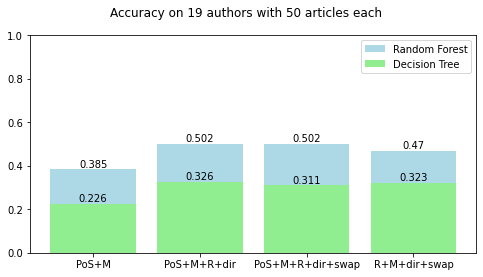

In [248]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
df_viz = pd.DataFrame({'accuracy_dt': [  0.22614840989399293,
                                         0.3263157894736842,
                                         0.31095406360424027,
                                         0.32280701754385965],
             'accuracy_forest': [0.38515901060070673,
                                 0.5017543859649123,
                                 0.5017667844522968,
                                 0.47017543859649125],
             'feature_sets': [  'PoS+M',
                                'PoS+M+R+dir',
                                'PoS+M+R+dir+swap',
                                'R+M+dir+swap'],
                      })
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
plt.ylim(0, 1)

plt.bar(df_viz['feature_sets'], df_viz['accuracy_forest'], color='lightblue')
plt.bar(df_viz['feature_sets'], df_viz['accuracy_dt'], color='lightgreen')

ax.bar_label(ax.containers[0], fmt="%.3g")
ax.bar_label(ax.containers[1], fmt="%.3g")

ax.legend(['Random Forest', 'Decision Tree'])

fig.suptitle("Accuracy on 19 authors with 50 articles each")
plt.show()
